In [2]:
import numpy as np 
import tensorflow as tf  
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import  Dense 
from sklearn.preprocessing import  StandardScaler 
from tensorflow.keras.datasets import  boston_housing 

import matplotlib.pyplot as plt

In [12]:
# 1️⃣ Load dataset
data=boston_housing.load_data()

(X_train,y_train),(X_test,y_test)=data


(404, 13)

In [4]:
# 2️⃣ Scale the features
scalar=StandardScaler()
X_train_scaled=scalar.fit_transform(X_train) 
X_test_scaled=scalar.transform(X_test)




In [5]:
# 3️⃣ Build the neural network model


model=Sequential([
    Dense(units=64,activation='relu',input_shape=(X_train.shape[1],)),
    Dense(units=32,activation='relu'),
    Dense(units=1,activation='linear')
])


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Compile the model
from tensorflow.keras.losses import  MeanSquaredError
model.compile(loss=MeanSquaredError,optimizer='adam',metrics=['mae'])

In [7]:
history=model.fit(X_train_scaled,y_train,validation_data=(X_test_scaled,y_test),epochs=100,verbose=1)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 571.5160 - mae: 22.0928 - val_loss: 568.0785 - val_mae: 21.9984
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 494.7227 - mae: 20.6271 - val_loss: 521.4138 - val_mae: 20.8761
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 471.8050 - mae: 19.5961 - val_loss: 467.0630 - val_mae: 19.5133
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 403.6721 - mae: 17.8954 - val_loss: 399.7995 - val_mae: 17.7724
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 384.7909 - mae: 17.0092 - val_loss: 321.2829 - val_mae: 15.6823
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 275.4322 - mae: 14.2462 - val_loss: 239.3445 - val_mae: 13.3033
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 188.4404 - mae: 11.5769 - val_loss: 164.3136 - val_mae: 10.8716
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 125.9489 - mae: 8.9141 - val_loss: 111.5817 - val_mae: 8.8660
Epoch 9/100
13/13 

In [8]:
loss, mae = model.evaluate(X_test_scaled, y_test)
print(f"Test MAE: {mae:.2f}, Test MSE: {loss:.2f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 15.2632 - mae: 2.7524 
Test MAE: 2.92, Test MSE: 20.31


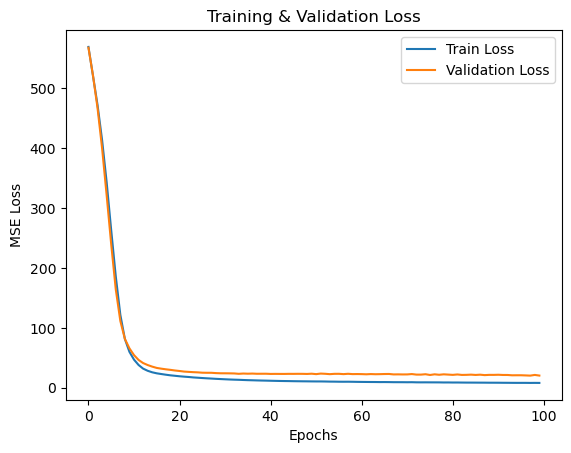

In [9]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.title('Training & Validation Loss')
plt.show()

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,029 (35.27 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,020 (23.52 KB)